In [108]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_df(path, encoding="utf-8"):
    loaded_pd = pd.read_csv(path, sep="\t", encoding=encoding)
    pd_name = path.split("/")[-1].split(".")[0]
    return pd_name, loaded_pd

In [3]:
paths_expression = glob.glob("data/expression data/*.txt")

In [4]:
expression_data = []
for path in paths_expression:
    expression_data.append(load_df(path))

In [5]:
paths_other = glob.glob("data/*.txt")
aligner_path = "data\phenotypes_id_aligner.txt"
other_data = []
for path in paths_other:
    if path == aligner_path:
        other_data.append(load_df(path, encoding="latin"))
    else:
        other_data.append(load_df(path))

## We have loaded the dataframes to lists

Each list contains tuples (name, dataframe)
- expression_data: tables with gene expressions
- other_data: all the remaining tables

In [6]:
#(other_data[2][1]).sum(axis=0)

In [7]:
#(other_data[2][1]["BXD8"] == 0).sum()

In [8]:
#[name for name, table in other_data]

In [9]:
#[name for name, table in expression_data]

In [10]:
#[name for name, table in other_data]

In [11]:
#list(other_data[3][1][other_data[3][1]["Category"] == "Immune"].sort_values("Strains", ascending=False)["Phenotype"])

In [12]:
#other_data[3][1][other_data[3][1]["Category"] == "Activity"].sort_values("Strains", ascending=False)

In [13]:
#other_data[3][1][other_data[3][1]["Phenotype"] == "Infectious disease, immune system: H5N1 influenza A virus survival time (10^4 EID-50 of HK213 virus in 30 microliters saline) [days, max to 30]"]

In [14]:
#list(other_data[3][1].sort_values("Strains", ascending=False)[16:]["Phenotype"])

In [139]:
# Look at the shapes and the NaN values of the dataframes

for i in range(len(expression_data)):
    df = expression_data[i][1].set_index('gene').transpose()
    print("Shape: " + repr(df.shape) + " ; Number of NaN values: " + repr(df.isna().sum().sum()))

Shape: (50, 25613) ; Number of NaN values: 0
Shape: (46, 25613) ; Number of NaN values: 0
Shape: (53, 25613) ; Number of NaN values: 0
Shape: (56, 25601) ; Number of NaN values: 0
Shape: (37, 28407) ; Number of NaN values: 0
Shape: (32, 46623) ; Number of NaN values: 2
Shape: (43, 45079) ; Number of NaN values: 0
Shape: (32, 25699) ; Number of NaN values: 0
Shape: (30, 45079) ; Number of NaN values: 0
Shape: (72, 45080) ; Number of NaN values: 0
Shape: (50, 26226) ; Number of NaN values: 0
Shape: (42, 28000) ; Number of NaN values: 0
Shape: (39, 28000) ; Number of NaN values: 0
Shape: (71, 45080) ; Number of NaN values: 0
Shape: (43, 25613) ; Number of NaN values: 0
Shape: (44, 25613) ; Number of NaN values: 0
Shape: (52, 45079) ; Number of NaN values: 0
Shape: (38, 45079) ; Number of NaN values: 0
Shape: (97, 2622) ; Number of NaN values: 154698
Shape: (97, 2622) ; Number of NaN values: 162564
Shape: (41, 26205) ; Number of NaN values: 0
Shape: (40, 26205) ; Number of NaN values: 0
Sh

In [140]:
# Compute the total set of mice strains present in the expressions dataframes
mice_set = set()

for i in range(len(expression_data)):
    df = expression_data[i][1].set_index('gene')
    mice_set.update(list(df.columns))

# Compute the total list of mice strains sorted alphabetically
mice_list = sorted(list(mice_set))
print(len(mice_list))

97


In [141]:
# Create a list of dataframes that always contain all mice (with NaN values if the mice are not originally present)
df_list = []

for i in range(len(expression_data)):
    df = expression_data[i][1].set_index('gene')
    missing_mice = mice_set - set(df.columns)
    for mouse in missing_mice:
        df[mouse] = np.NaN
        
    # Order the columns alphabetically
    df = df[mice_list]
    df_list.append(df)

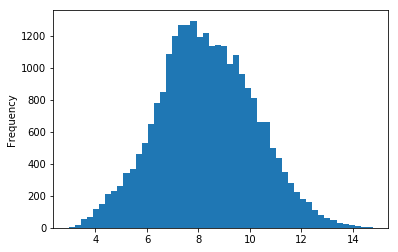

In [142]:
df_list[0]['BXD99'].plot.hist(bins=50)

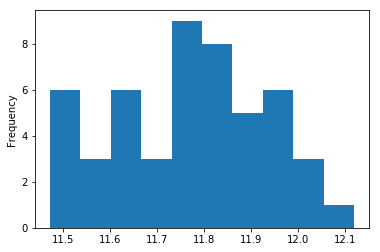

In [143]:
df_list[0].transpose()['Nmt1_10338077'].plot.hist(bins=10)